IMPORTING NECESSARY LIBRARIES

In [6]:
import os
from collections import Counter
from PIL import Image , ImageDraw
import matplotlib.pyplot as plt

DEFINING THE PATH OF THE DATASET

In [7]:
images_path = '/home/nova/Pictures/rtl/train/images'
labels_path = '/home/nova/Pictures/rtl/train/labels'

ANALYSING THE DATASET

Total images: 2000
Total label files: 2000
Class distribution:
  holding: 100 images
  riding: 200 images
  washing: 100 images
  writing: 200 images
  playing: 100 images
  feeding: 100 images
  fixing: 200 images
  cooking: 100 images
  drinking: 100 images
  rowing: 100 images
  texting: 100 images
  using: 100 images
  watching: 100 images
  throwing: 100 images
  cutting: 100 images
  pushing: 100 images
  walking: 100 images

Displaying sample images:


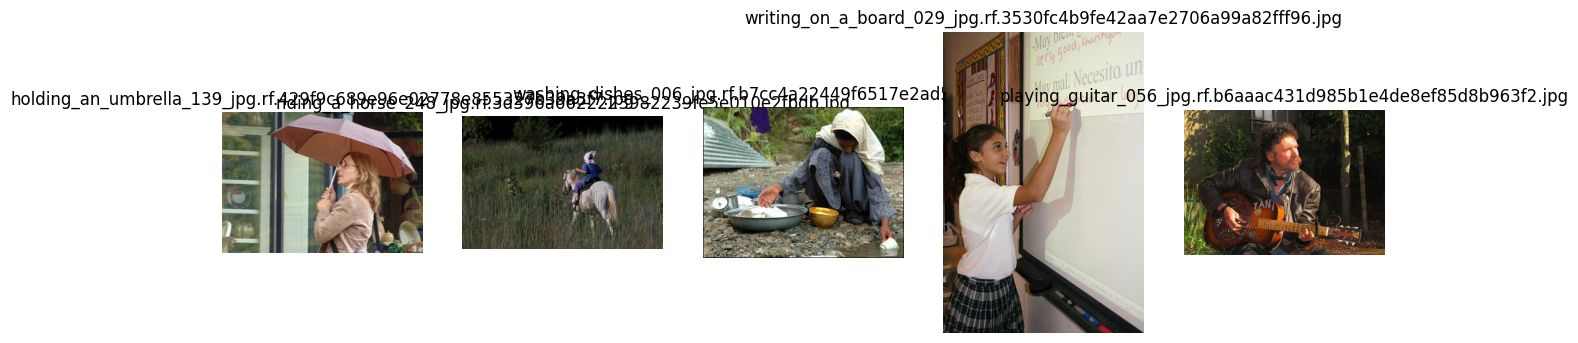

In [8]:
if not os.path.isdir(images_path) or not os.path.isdir(labels_path):
    print("One or both of the paths do not exist.")
    exit()
image_count = 0
label_count = 0
class_counter = Counter()
for filename in os.listdir(images_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_count += 1
        class_name = filename.split('_')[0]  
        class_counter[class_name] += 1
for filename in os.listdir(labels_path):
    if filename.endswith('.txt'):
        label_count += 1

print(f"Total images: {image_count}")
print(f"Total label files: {label_count}")
print("Class distribution:")
for class_name, count in class_counter.items():
    print(f"  {class_name}: {count} images")

def display_sample_images(path, num_samples=5):
    sample_images = [img for img in os.listdir(path) if img.endswith(('.jpg', '.jpeg', '.png'))][:num_samples]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images, 1):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)
    plt.show()

print("\nDisplaying sample images:")
display_sample_images(images_path)


In normal CNN which we have seen previously used we did not use bounding boxe regression is going to be used along with YOLOv11 to improve real life accucracy


Displaying sample images with bounding boxes:


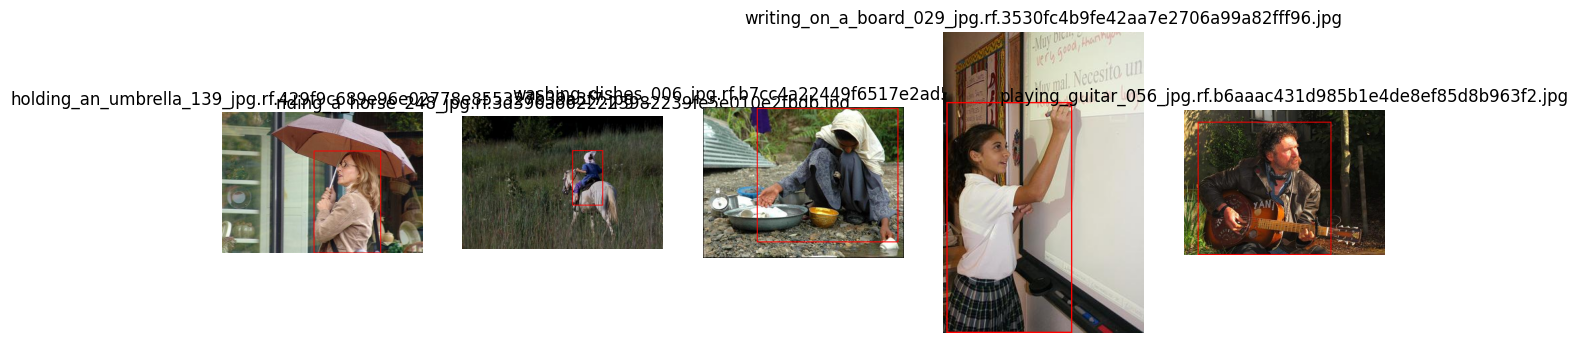

In [9]:
if not os.path.isdir(images_path) or not os.path.isdir(labels_path):
    print("One or both of the paths do not exist.")
    exit()
def draw_bounding_boxes(image_path, label_path):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"Skipping invalid label line: {line}")
                continue
            class_id, x_center, y_center, width, height = map(float, parts)
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height       
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)           
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)
    return image
def display_images_with_bboxes(num_samples=5):
    sample_images = [img for img in os.listdir(images_path) if img.endswith(('.jpg', '.jpeg', '.png'))][:num_samples]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images, 1):
        img_path = os.path.join(images_path, img_name)
        base_name = os.path.splitext(img_name)[0]
        label_path = os.path.join(labels_path, base_name + '.txt')
        
        if not os.path.isfile(label_path):
            print(f"No label file found for {img_name}")
            continue
        
        image_with_boxes = draw_bounding_boxes(img_path, label_path)
        
        plt.subplot(1, num_samples, i)
        plt.imshow(image_with_boxes)
        plt.axis('off')
        plt.title(img_name)
    plt.show()

print("\nDisplaying sample images with bounding boxes:")
display_images_with_bboxes()


In [3]:
!nvidia-smi

Sat Nov  9 19:33:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.28.03              Driver Version: 560.28.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0             17W /   80W |      15MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
pip install -U ultralytics

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 414.9 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 785.0 kB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.5/317.5 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 815.6 kB/s eta 0:00:006m0:00:01-:--:--
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


To display the results in a more detailed way we have use wandb here

In [5]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /home/nova/.netrc


True

In [15]:
from ultralytics import YOLO
import yaml
import os
from pathlib import Path

def init_wandb(project_name="yolo-detection"):
    wandb.init(project=project_name)
    
def load_data_config(data_yaml):
    with open(data_yaml, 'r') as f:
        data_dict = yaml.safe_load(f)
    return data_dict

def setup_training_config():
    config = {
        "model": "yolo11s.pt",
        "data": "/home/nova/Pictures/rtl/data.yaml",
        "epochs": 20,
        "imgsz": 640,
        "batch": 16,
        "patience": 50,
        "augment": True,
        "plots": True,
    }
    return config

def train_yolo_with_wandb():
    init_wandb()
    config = setup_training_config()
    data_dict = load_data_config(config["data"])
    wandb.config.update(config)
    wandb.config.update({"dataset": data_dict})
    model = YOLO(config["model"])
    results = model.train(
        data=config["data"],
        epochs=config["epochs"],
        imgsz=config["imgsz"],
        batch=config["batch"],
        augment=config["augment"],
        plots=config["plots"],
        patience=config["patience"],
        callbacks=[
            "wandb",
        ]
    )
    wandb.log({
        "final_box_loss": float(results.results_dict["box_loss"]),
        "final_cls_loss": float(results.results_dict["cls_loss"]),
        "final_dfl_loss": float(results.results_dict["dfl_loss"]),
        "final_map50": float(results.results_dict["metrics/mAP50(B)"]),
        "final_map50_95": float(results.results_dict["metrics/mAP50-95(B)"])
    })
    model_artifact = wandb.Artifact(
        name="trained_model",
        type="model",
        description="YOLO model trained on custom dataset"
    )
    model_artifact.add_file("runs/detect/train/weights/best.pt")
    wandb.log_artifact(model_artifact)
    
    return results

if __name__ == "__main__":
    try:
        results = train_yolo_with_wandb()
        print("Training completed successfully!")
        print(f"Best mAP50: {results.results_dict['metrics/mAP50(B)']:.3f}")
        print(f"Best mAP50-95: {results.results_dict['metrics/mAP50-95(B)']:.3f}")
    except Exception as e:
        print(f"Training failed with error: {str(e)}")
    finally:
        wandb.finish()

New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Training failed with error: 'callbacks' is not a valid YOLO argument. 

    Arguments received: ['yolo', '--f=/home/nova/.local/share/jupyter/runtime/kernel-v2-36526BrYROcP4LO4y.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'segment', 'pose', 'obb', 'classify'}
                MODE (required) is one of {'export', 'track', 'benchmark', 'val', 'predict', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model a

In [16]:
!yolo task=detect mode=train model=yolo11s.pt data=/home/nova/Pictures/rtl/data.yaml epochs=20 imgsz=640 augment=True plots=True

New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.21 🚀 Python-3.12.2 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7836MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/nova/Pictures/rtl/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed

In [ ]:
from ultralytics import YOLO
model = YOLO('detect/train2/weights/best.pt')  

In [2]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

In [2]:
model.predict(source="/home/nova/Downloads/download.jpeg", show=True, conf=0.25)


image 1/1 /home/nova/Downloads/download.jpeg: 352x640 1 writing_on_a_board, 51.3ms
Speed: 2.5ms preprocess, 51.3ms inference, 131.8ms postprocess per image at shape (1, 3, 352, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cooking', 1: 'cutting_trees', 2: 'drinking', 3: 'feeding_a_horse', 4: 'fixing_a_bike', 5: 'fixing_a_car', 6: 'holding_an_umbrella', 7: 'playing_guitar', 8: 'pushing_a_cart', 9: 'riding_a_bike', 10: 'riding_a_horse', 11: 'rowing_a_boat', 12: 'texting_message', 13: 'throwing_frisby', 14: 'using_a_computer', 15: 'walking_the_dog', 16: 'washing_dishes', 17: 'watching_TV', 18: 'writing_on_a_board', 19: 'writing_on_a_book'}
 obb: None
 orig_img: array([[[167, 185, 184],
         [145, 172, 168],
         [102, 149, 141],
         ...,
         [199, 186, 170],
         [199, 186, 170],
         [199, 186, 170]],
 
        [[168, 184, 183],
         [148, 173, 169],
         [104, 149, 140],
         ...,
         [199, 186, 170],
         [199, 186, 170],
         [199, 186, 170]],
 
        [[168, 182, 181],
         [152, 175, 171],
      

In [3]:
results = model.predict(source=0, conf=0.25)


1/1: 0... Success ✅ (inf frames of shape 640x480 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 (no detections), 1087.2ms
0: 480x640 1 texting_message, 1 writing_on_a_board, 20.8ms
0: 480x640 1 texting_message, 16.1ms
0: 480x640 1 texting_message, 14.7ms
0: 480x640 1 texting_message, 22.1ms
0: 480x640 1 texting_message, 22.8ms
0: 480x640 1 texting_message, 14.8ms
0: 480x640 1 texting_message, 14.4ms
0: 480x640 1 texting_message, 22.6ms
0: 480x640 1 texting_message, 22.5ms


In [6]:
metrics = model.val(data="/home/nova/Pictures/rtl/data.yaml")

Ultralytics 8.3.21 🚀 Python-3.12.3 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7836MiB)


val: Scanning /home/nova/Pictures/rtl/valid/labels.cache... 1858 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1858/1858 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 117/117 [00:22<00:00,  5.21it/s]


                   all       1858       1895      0.822      0.825       0.87      0.744
               cooking        188        190      0.935      0.837      0.952      0.838
         cutting_trees        103        105      0.787       0.88      0.895      0.723
              drinking        156        158      0.957      0.848      0.951       0.87
       feeding_a_horse        187        189      0.932      0.899       0.96      0.849
         fixing_a_bike        128        130       0.78      0.808      0.852      0.677
          fixing_a_car        151        155       0.89      0.938      0.961      0.827
   holding_an_umbrella        192        200      0.881      0.925      0.961      0.816
        playing_guitar        189        197      0.967      0.934      0.986      0.912
        pushing_a_cart        135        135      0.845      0.859      0.921      0.779
         riding_a_bike        193        195      0.935      0.954      0.982      0.868
        riding_a_hors